In [154]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Dataset: https://www.kaggle.com/datasets/uciml/adult-census-income?resource=download

In [213]:
def calc_count(listing):
    count = {}
    for val in listing:
        if val in count:
            count[val] += 1
        else:
            count[val] = 1
    return count

In [252]:
def eda_analysis(column_label, df):
    workclass = df.loc[:,column_label].tolist()
    count_workclass = dict(sorted(calc_count(workclass).items(), key=lambda item: item[1], reverse=1))
    # count_workclass
    sns.histplot(workclass)
    plt.xticks(rotation=90)
    plt.title(column_label)
    plt.savefig(column_label.replace(".","_")+".png")
    return count_workclass

In [253]:
df = pd.read_csv('Datasets/adult.csv')


In [254]:
df = df.drop(labels=["native.country", "fnlwgt"], axis=1)

missing_values_idx = df[df.eq("?").any(1)].index
df = df.drop(missing_values_idx, axis=0)
df.head

<bound method NDFrame.head of        age workclass     education  education.num      marital.status  \
1       82   Private       HS-grad              9             Widowed   
3       54   Private       7th-8th              4            Divorced   
4       41   Private  Some-college             10           Separated   
5       34   Private       HS-grad              9            Divorced   
6       38   Private          10th              6           Separated   
...    ...       ...           ...            ...                 ...   
32556   22   Private  Some-college             10       Never-married   
32557   27   Private    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private       HS-grad              9  Married-civ-spouse   
32559   58   Private       HS-grad              9             Widowed   
32560   22   Private       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
1        Exec-manager

{'HS-grad': 9968,
 'Some-college': 6775,
 'Bachelors': 5182,
 'Masters': 1675,
 'Assoc-voc': 1321,
 '11th': 1056,
 'Assoc-acdm': 1020,
 '10th': 831,
 '7th-8th': 573,
 'Prof-school': 558,
 '9th': 463,
 'Doctorate': 398,
 '12th': 393,
 '5th-6th': 303,
 '1st-4th': 156,
 'Preschool': 46}

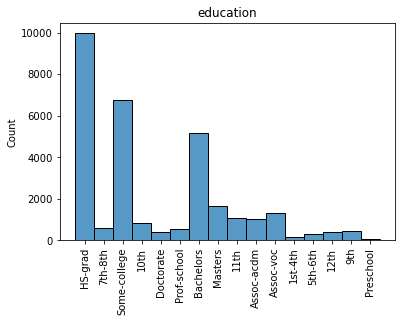

In [255]:
education_count = eda_analysis("education", df)
df["education"].replace(["Doctorate", 'Prof-school', 'Masters', 'Bachelors', 'Some-college', 'HS-grad', 'Assoc-voc', '11th','Assoc-acdm', '10th', '7th-8th',
                         '9th', '12th','5th-6th', '1st-4th', 'Preschool'], [6,6,5,4,3,2,1,1,1,1,1,1,1,1,1,1], inplace=True)
education_count

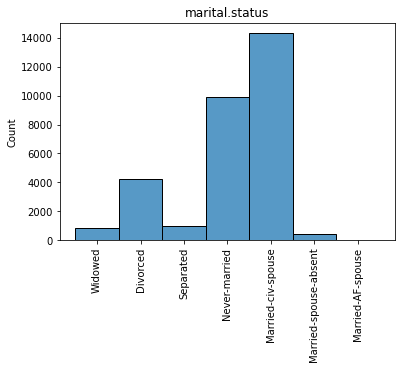

In [256]:
marital_count = eda_analysis("marital.status", df)
marital_count
df["marital.status"].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse'],
                             [4,3,2,2,1,4,4], inplace=True)


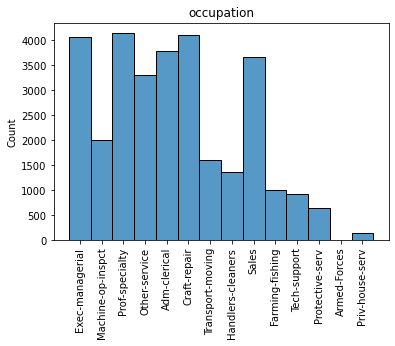

In [257]:
marital_count = eda_analysis("occupation", df)
marital_count
df["occupation"].replace(['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical','Sales','Other-service','Machine-op-inspct','Transport-moving',
                'Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces'], 
               [14,13,12,11,10,9,8,7,6,5,4,3,2,1], inplace=True)

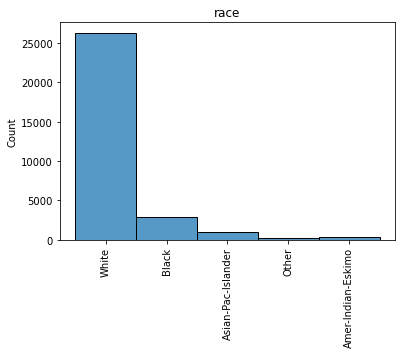

In [258]:
marital_count = eda_analysis("race", df)
marital_count
df["race"].replace(['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], [5,4,3,2,1], inplace=True)


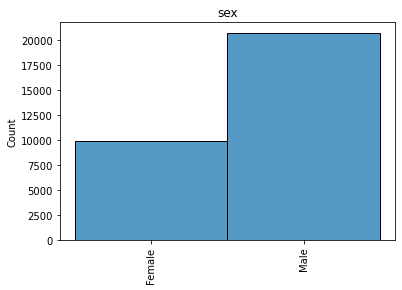

In [259]:
marital_count = eda_analysis("sex", df)
marital_count
df["sex"].replace(['Female', 'Male'], [1,2], inplace=True)

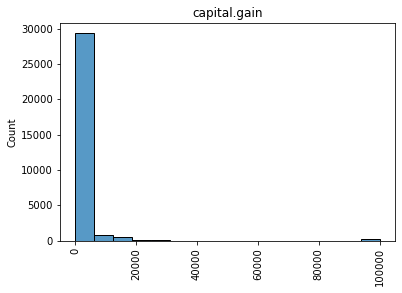

In [260]:
marital_count = eda_analysis("capital.gain", df)


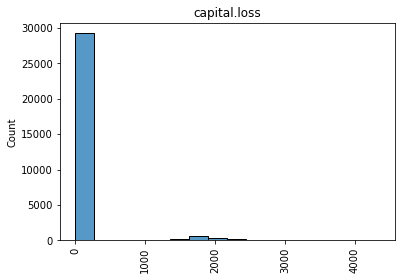

In [261]:
marital_count = eda_analysis("capital.loss", df)

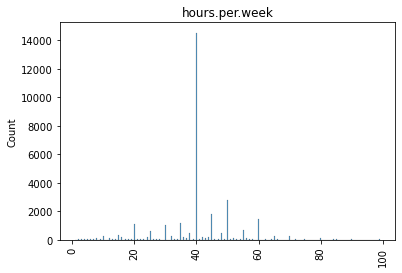

In [262]:
marital_count = eda_analysis("hours.per.week", df)

{'<=50K': 23068, '>50K': 7650}

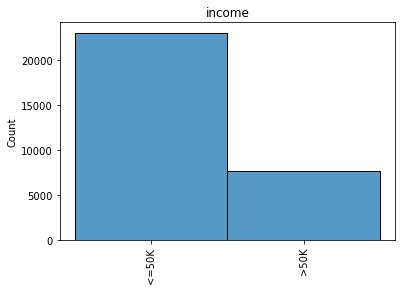

In [263]:
income = df.loc[:,"income"].tolist()
marital_count = eda_analysis("income", df)
df["income"].replace(['<=50K', '>50K'], [1,2], inplace=True)
marital_count


In [226]:
df = df.drop(labels=["education.num", "relationship", "workclass"], axis=1)

In [227]:
df.columns
# df.head

Index(['age', 'education', 'marital.status', 'occupation', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'income'],
      dtype='object')

In [228]:
df.head

<bound method NDFrame.head of        age  education  marital.status  occupation  race  sex  capital.gain  \
1       82          2               1          12     5    1             0   
3       54          1               2           8     5    1             0   
4       41          3               2          14     5    1             0   
5       34          2               2           9     5    1             0   
6       38          1               2          11     5    2             0   
...    ...        ...             ...         ...   ...  ...           ...   
32556   22          3               3           3     5    2             0   
32557   27          1               4           4     5    1             0   
32558   40          2               4           8     5    2             0   
32559   58          2               1          11     5    1             0   
32560   22          2               3          11     5    2             0   

       capital.loss  hours.per.we

In [229]:
correlation = df.corr()
correlation

,age,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.081213,0.030262,0.079849,0.036374,0.082117,0.080392,0.060409,0.101879,0.242431
education,0.081213,1.000000,0.091681,0.319303,0.026254,0.027539,0.141800,0.084411,0.139211,0.325670
marital.status,0.030262,0.091681,1.000000,0.042989,0.039860,0.447084,0.065589,0.061413,0.163355,0.354533
occupation,0.079849,0.319303,0.042989,1.000000,0.037288,-0.034597,0.073157,0.049251,0.054927,0.184381
race,0.036374,0.026254,0.039860,0.037288,1.000000,0.065004,0.008203,0.018872,0.034405,0.067332
sex,0.082117,0.027539,0.447084,-0.034597,0.065004,1.000000,0.047757,0.047010,0.230321,0.216626
capital.gain,0.080392,0.141800,0.065589,0.073157,0.008203,0.047757,1.000000,-0.032332,0.079548,0.221871
capital.loss,0.060409,0.084411,0.061413,0.049251,0.018872,0.047010,-0.032332,1.000000,0.053961,0.151461
hours.per.week,0.101879,0.139211,0.163355,0.054927,0.034405,0.230321,0.079548,0.053961,1.000000,0.228547
income,0.242431,0.325670,0.354533,0.184381,0.067332,0.216626,0.221871,0.151461,0.228547,1.000000


Text(0.5, 1.0, 'Income Correlation')

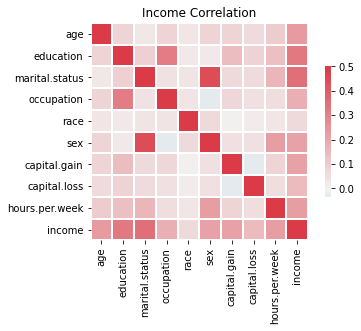

In [230]:
cmap = sns.diverging_palette(220,10, as_cmap=True) 
sns.heatmap(correlation, vmax=0.5, center=0, cmap=cmap, square=True, linewidth=1, cbar_kws={"shrink": 0.6}).set_title("Income Correlation")

In [232]:
pd.pivot_table(df, values=['age', 'education', 'marital.status', 'occupation', 'race', 'sex', 'capital.gain', 'capital.loss', 
                           'hours.per.week'], index=['income'])

,age,capital.gain,capital.loss,education,hours.per.week,marital.status,occupation,race,sex
income,,,,,,,,,
1,36.612190,148.055618,53.528524,2.403199,39.371900,3.085530,9.907968,4.757543,1.618389
2,43.966013,3994.758170,195.601046,3.375817,45.705882,3.768497,11.170980,4.854379,1.852680


**EDA Analysis:**
The higher the score, the more closer is to the estimated results of each column. For income 1 = <=50K and 2 = >50K.

In [233]:
df.describe()

,age,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,2.645420,3.255616,10.222508,4.781659,1.676737,1106.037079,88.910216,40.949313,1.249040
std,13.118227,1.291561,0.833092,2.962386,0.621965,0.467730,7497.863364,405.657203,11.985382,0.432464
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,28.000000,2.000000,3.000000,8.000000,5.000000,1.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,2.000000,3.000000,11.000000,5.000000,2.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,4.000000,4.000000,13.000000,5.000000,2.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,6.000000,4.000000,14.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,2.000000


In [234]:
X = df.loc[:,['age', 'education', 'marital.status', 'occupation', 'race', 'sex','capital.gain', 'capital.loss', 'hours.per.week']]
X

,age,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week
1,82,2,1,12,5,1,0,4356,18
3,54,1,2,8,5,1,0,3900,40
4,41,3,2,14,5,1,0,3900,40
5,34,2,2,9,5,1,0,3770,45
6,38,1,2,11,5,2,0,3770,40
...,...,...,...,...,...,...,...,...,...
32556,22,3,3,3,5,2,0,0,40
32557,27,1,4,4,5,1,0,0,38
32558,40,2,4,8,5,2,0,0,40
32559,58,2,1,11,5,1,0,0,40


In [235]:
Y = df.loc[:,'income']
Y

1        1
3        1
4        1
5        1
6        1
        ..
32556    1
32557    1
32558    2
32559    1
32560    1
Name: income, Length: 30718, dtype: int64

**Model Development**

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 3.32035145, -0.49972888, -2.70756628, ..., -0.14751604,
        10.51912603, -1.91480644],
       [ 1.18588199, -1.27399862, -1.50719939, ..., -0.14751604,
         9.39500591, -0.0792072 ],
       [ 0.19487831,  0.27454086, -1.50719939, ..., -0.14751604,
         9.39500591, -0.0792072 ],
       ...,
       [ 0.11864726, -0.49972888,  0.89353439, ..., -0.14751604,
        -0.2191793 , -0.0792072 ],
       [ 1.4908062 , -0.49972888, -2.70756628, ..., -0.14751604,
        -0.2191793 , -0.0792072 ],
       [-1.25351168, -0.49972888, -0.3068325 , ..., -0.14751604,
        -0.2191793 , -1.74793378]])

In [237]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=30)

In [238]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
X_pca = pca.fit_transform(X)
X_pca.shape
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=30)

Using SVM as my model

In [239]:
from sklearn import svm
from sklearn import metrics

svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

In [240]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision calc:", metrics.precision_score(y_test, y_pred_svm))
print("Recall calc:", metrics.recall_score(y_test, y_pred_svm))


Accuracy: 0.8465169270833334
Precision calc: 0.8616290480863592
Recall calc: 0.9485738980121002


Text(42.0, 0.5, 'Truth')

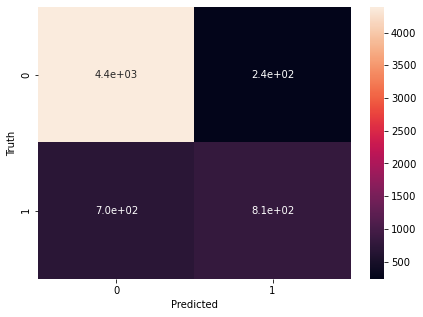

In [241]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7,5))
sn.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [242]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90      4628
           2       0.77      0.53      0.63      1516

    accuracy                           0.85      6144
   macro avg       0.82      0.74      0.77      6144
weighted avg       0.84      0.85      0.84      6144



Using KNN as my model

In [243]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)


In [244]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision calc:", metrics.precision_score(y_test, y_pred_knn))
print("Recall calc:", metrics.recall_score(y_test, y_pred_knn))

Accuracy: 0.8146158854166666
Precision calc: 0.8312132143535219
Recall calc: 0.945980985306828


Text(42.0, 0.5, 'Truth')

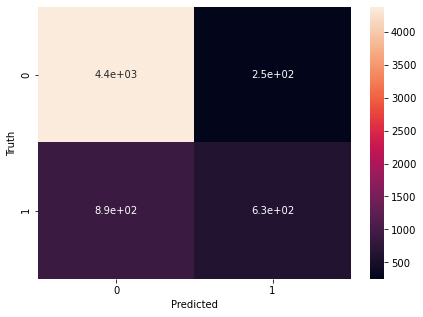

In [245]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7,5))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [246]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.83      0.95      0.88      4628
           2       0.71      0.41      0.52      1516

    accuracy                           0.81      6144
   macro avg       0.77      0.68      0.70      6144
weighted avg       0.80      0.81      0.80      6144



Using Linear SVC as my model

In [247]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)


C:\Users\sguad\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [248]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision calc:", metrics.precision_score(y_test, y_pred_svc))
print("Recall calc:", metrics.recall_score(y_test, y_pred_svc))

Accuracy: 0.8336588541666666
Precision calc: 0.8482039397450754
Recall calc: 0.9490060501296457


Text(42.0, 0.5, 'Truth')

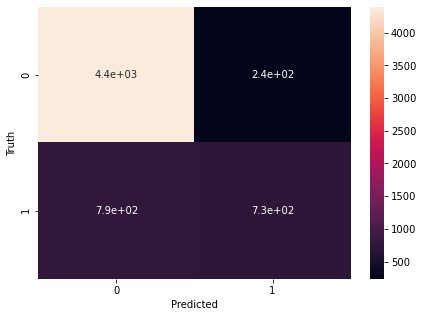

In [249]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(7,5))
sn.heatmap(cm_svc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [250]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.85      0.95      0.90      4628
           2       0.76      0.48      0.59      1516

    accuracy                           0.83      6144
   macro avg       0.80      0.72      0.74      6144
weighted avg       0.83      0.83      0.82      6144

